# Project 2: SIIM-ISIC Melanoma Classification
### Author: Rauf Mahmudzade
### Date: 11/21/2020

## **General Information about Melanoma:** 

Skin cancer is the most prevalent type of cancer. Melanoma, specifically, is responsible for 75% of skin cancer deaths, despite being the least common skin cancer. The American Cancer Society estimates over 100,000 new melanoma cases will be diagnosed in 2020. It's also expected that almost 7,000 people will die from the disease. As with other cancers, early and accurate detection—potentially aided by data science—can make treatment more effective.

Currently, dermatologists evaluate every one of a patient's moles to identify outlier lesions or “ugly ducklings” that are most likely to be melanoma. Existing AI approaches have not adequately considered this clinical frame of reference. Dermatologists could enhance their diagnostic accuracy if detection algorithms take into account “contextual” images within the same patient to determine which images represent a melanoma. If successful, classifiers would be more accurate and could better support dermatological clinic work.

As the leading healthcare organization for informatics in medical imaging, the Society for Imaging Informatics in Medicine (SIIM)'s mission is to advance medical imaging informatics through education, research, and innovation in a multi-disciplinary community. SIIM is joined by the International Skin Imaging Collaboration (ISIC), an international effort to improve melanoma diagnosis. The ISIC Archive contains the largest publicly available collection of quality-controlled dermoscopic images of skin lesions

## **References:** 

https://www.cancer.org/cancer/melanoma-skin-cancer/about/what-is-melanoma.html

https://siim.org/page/about_siim

https://www.kaggle.com/c/siim-isic-melanoma-classification/overview

## **Objective of this project:** 

The objective of this competition is to identify melanoma in images of skin lesions. In particular, we need to use images within the same patient and determine which are likely to represent a melanoma. In other words, we need to create a model which should predict the probability whether the lesion in the image is malignantor benign.Value 0 denotes benign, and 1 indicates malignant.

## **Dataset: SIIM-ISIC Melanoma Classification**

The images are provided in DICOM format. This can be accessed using commonly-available libraries like pydicom, and contains both image and metadata. It is a commonly used medical imaging data format.

Images are also provided in JPEG and TFRecord format (in the jpeg and tfrecords directories, respectively). Images in TFRecord format have been resized to a uniform 1024x1024.

Metadata is also provided outside of the DICOM format, in CSV files. See the Columns section for a description.


## Note: **I used only training/testing csv and jpeg files provided** 

## **Columns (Features) of Training Dataset** 

1) ***image_name*** - unique identifier, points to filename of related DICOM image

2) ***patient_id*** - unique patient identifier

3) ***sex*** - the sex of the patient (when unknown, will be blank)

4) ***age_approx*** - approximate patient age at time of imaging

5) ***anatom_site_general_challenge*** - location of imaged site

6) ***diagnosis*** - detailed diagnosis information

7) ***benign_malignant*** - indicator of malignancy of imaged lesion

8) ***target*** - binarized version of the target variable

## **Columns (Features) of Testing Dataset** 

1) ***image_name*** - unique identifier, points to filename of related DICOM image

2) ***patient_id*** - unique patient identifier

3) ***sex*** - the sex of the patient (when unknown, will be blank)

4) ***age_approx*** - approximate patient age at time of imaging

5) ***anatom_site_general_challenge*** - location of imaged site

## **Additional Dataset References:**

The ISIC 2020 Challenge Dataset https://doi.org/10.34970/2020-ds01 (c) by ISDIS, 2020

Creative Commons Attribution-Non Commercial 4.0 International License.

The dataset was generated by the International Skin Imaging Collaboration (ISIC) and images are from the following sources: Hospital Clínic de Barcelona, Medical University of Vienna, Memorial Sloan Kettering Cancer Center, Melanoma Institute Australia, The University of Queensland, and the University of Athens Medical School.

You should have received a copy of the license along with this work.

If not, see https://creativecommons.org/licenses/by-nc/4.0/legalcode.txt.

## Part 1: Importing Libraries

In [3]:
import os
from os import listdir
import pydicom
from PIL import Image


import pandas as pd 
import numpy as np
import cv2
import seaborn as sns
from tqdm import tqdm

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.express as px

from matplotlib import cm
from matplotlib import pyplot as plt
%matplotlib inline

## Part 2: Reading Training/Testing CSV Files

In [4]:
train_df = pd.read_csv('../Kaggle_Cancer_Dataset/train.csv')
test_df = pd.read_csv('../Kaggle_Cancer_Dataset/test.csv')

In [5]:
#Training data
print('Training data shape: ', train_df.shape)
train_df.head(10)

Training data shape:  (33126, 8)


image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   
5  ISIC_0074311  IP_2950485  female        40.0               lower extremity   
6  ISIC_0074542  IP_4698288    male        25.0               lower extremity   
7  ISIC_0075663  IP_6017204  female        35.0                         torso   
8  ISIC_0075914  IP_7622888    male        30.0                         torso   
9  ISIC_0076262  IP_5075533  female        50.0               lower extremity   

  diagnosis benign_malignant  target  
0   unknown           benign       0  
1   unknown           benign       0  
2     nevus           benign       0  
3   unknown           benign       0  
4   unknown           benign       0  
5   unknown           benign       0  
6   unknown           benign       0  
7   unknown           benign       0  
8   unknown           benign       0  
9   unknown           benign       0

In [6]:
#Testing data
print('Test data shape: ', test_df.shape)
test_df.head(10)

Test data shape:  (10982, 5)


image_name  patient_id     sex  age_approx anatom_site_general_challenge
0  ISIC_0052060  IP_3579794    male        70.0                           NaN
1  ISIC_0052349  IP_7782715    male        40.0               lower extremity
2  ISIC_0058510  IP_7960270  female        55.0                         torso
3  ISIC_0073313  IP_6375035  female        50.0                         torso
4  ISIC_0073502  IP_0589375  female        45.0               lower extremity
5  ISIC_0074618  IP_4438996    male        50.0               lower extremity
6  ISIC_0076801  IP_3110660    male        45.0               upper extremity
7  ISIC_0077586  IP_8578442    male        50.0               lower extremity
8  ISIC_0082004  IP_0817448  female        45.0                         torso
9  ISIC_0082785  IP_3634181    male        65.0               lower extremity

## Part 3: Data Preprocessing

## Part 3A: Checking for null/unknown values

In [7]:
#Checking for null values in training dataset
train_df.isnull().values.any()
#There are null values in training dataset

True

In [8]:
#Checking to see how many null values exist in each column of training dataset
# To find the number of null values of a specific column: 
# null = 33126 entries (total number of entries) - non-null (given below)
train_df.info()
# For instance, in age_approx column there are = 33126-33058 = 68 null/unknown values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [9]:
#Checking for null values in test dataset
test_df.isnull().values.any()
#There are null values in training dataset

True

In [10]:
#Checking to see how many null values exist in each column of testing dataset
# To find the number of null values 'null = 10982 entries (total number of entries) - non-null (given below)'
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10982 entries, 0 to 10981
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     10982 non-null  object 
 1   patient_id                     10982 non-null  object 
 2   sex                            10982 non-null  object 
 3   age_approx                     10982 non-null  float64
 4   anatom_site_general_challenge  10631 non-null  object 
dtypes: float64(1), object(4)
memory usage: 429.1+ KB


## Part 3B: Dealing with Missing Values

In [11]:
#The size of the training dataset is reduced from 33126 to 32531 rows 
train_data_imb = train_df.dropna(axis = 0, how ='any')
train_data_imb.shape

(32531, 8)

In [12]:
#There are no more null/NaN values in our training dataset
train_data_imb.isnull().values.any()

False

In [13]:
#The size of the training dataset is reduced from 10982 to 10631 rows 
test_data = test_df.dropna(axis = 0, how ='any')

#Setting the number of testing images we will use
test_data=test_data[:1000]
test_data.shape

(1000, 5)

In [14]:
#There are no more null/NaN values in our testing dataset
test_data.isnull().values.any()

False

## Part 4: Exploratory Data Analysis (EDA)
### References: There were excell visualization methods provided in below given notebooks. I used some of their techniques to effectively visualize train/test datasets.

https://www.kaggle.com/allunia/don-t-turn-into-a-smoothie-after-the-shake-up

https://www.kaggle.com/datafan07/analysis-of-melanoma-metadata-and-effnet-ensemble 

## Target Counts (Finding Number of Benign and Malignant Tumors) and Distribution

In [15]:
# Counts of Malignant and Benign Tumors in Training Dataset
M = train_data_imb[(train_data_imb['benign_malignant'] == 'malignant')]
B = train_data_imb[(train_data_imb['benign_malignant'] == 'benign' )]


trace = go.Bar( x = ['Benign', 'Malignant'], y = (len(B), len(M)), orientation = 'v', opacity = 0.8, marker=dict(
        color=[ 'royalblue', 'orangered'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Target Counts in Training Dataset')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

## This dataset is highly imbalanced. We will use a resampling technique to eliminate significant inequal distribution of data between benign and malignant tumors

In [16]:
X=train_data_imb.values
X_columns=train_data_imb.columns
y=train_data_imb['target'].values

In [17]:
X_columns

Index(['image_name', 'patient_id', 'sex', 'age_approx',
       'anatom_site_general_challenge', 'diagnosis', 'benign_malignant',
       'target'],
      dtype='object')

In [1]:
## If first time running the code, run this line. If it is second or third time, please comment out this part
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=0.08)
X_rus, y_rus= rus.fit_sample(X, y)
train_data=pd.DataFrame(X_rus, columns = X_columns)

train_data=train_data.sample(frac=1)
train_data.shape

In [ ]:
train_data.info()

In [84]:
train_data['age_approx']=train_data['age_approx'].astype(str).astype(float)

In [85]:
train_data['target']=train_data['target'].astype(str).astype(float)

In [86]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7762 entries, 0 to 7761
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     7762 non-null   object 
 1   patient_id                     7762 non-null   object 
 2   sex                            7762 non-null   object 
 3   age_approx                     7762 non-null   float64
 4   anatom_site_general_challenge  7762 non-null   object 
 5   diagnosis                      7762 non-null   object 
 6   benign_malignant               7762 non-null   object 
 7   target                         7762 non-null   float64
dtypes: float64(2), object(6)
memory usage: 485.2+ KB


In [88]:
train_data.reset_index(inplace=True,drop=True)
train_image_id = train_data.image_name
print(train_image_id.shape)

(7762,)


In [94]:
train_data.head(10)

image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_9555580  IP_5086698  female        65.0                         torso   
1  ISIC_4030363  IP_0175414    male        60.0               lower extremity   
2  ISIC_6580482  IP_1005683    male        65.0                         torso   
3  ISIC_3898738  IP_3025705  female        30.0                         torso   
4  ISIC_7123768  IP_0393526    male        35.0                         torso   
5  ISIC_0584461  IP_3253955  female        55.0                         torso   
6  ISIC_7976724  IP_1697215  female        35.0               upper extremity   
7  ISIC_4932813  IP_4448203    male        75.0                     head/neck   
8  ISIC_2853290  IP_1671181  female        35.0               lower extremity   
9  ISIC_8613613  IP_1671181  female        35.0               lower extremity   

  diagnosis benign_malignant  target  
0     nevus           benign     0.0  
1   unknown           benign     0.0  
2   unknown           benign     0.0  
3   unknown           benign     0.0  
4     nevus           benign     0.0  
5   unknown           benign     0.0  
6   unknown           benign     0.0  
7   unknown           benign     0.0  
8   unknown           benign     0.0  
9   unknown           benign     0.0

In [92]:
# Counts of Malignant and Benign Tumors in Training Dataset
M = train_data[(train_data['benign_malignant'] == 'malignant')]
B = train_data[(train_data['benign_malignant'] == 'benign' )]


trace = go.Bar( x = ['Benign', 'Malignant'], y = (len(B), len(M)), orientation = 'v', opacity = 0.8, marker=dict(
        color=[ 'royalblue', 'orangered'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Target Counts in Training Dataset')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

## Observation: Training Dataset is now balanced and will yield more accurate predictions

## Part 4A: Unique Images

In [26]:
# There are no duplicate images in training dataset. All of them are unique
train_data.image_name.nunique()

7762

## Part 4B: Unique Patients

In [27]:
#Checking unique patients in training dataset
print(f"The total number of patient IDs are {train_data['patient_id'].count()}, from those the unique ids are {train_data['patient_id'].nunique()} ")

The total number of patient IDs are 7762, from those the unique ids are 1804 


In [28]:
#Checking unique patients in training dataset
print(f"The total number of patient IDs are {test_data['patient_id'].count()}, from those the unique ids are {test_data['patient_id'].nunique()} ")

The total number of patient IDs are 1000, from those the unique ids are 425 


In [29]:
train_data.patient_id.nunique()

1804

### This means that there are multiple records (images) for each patient

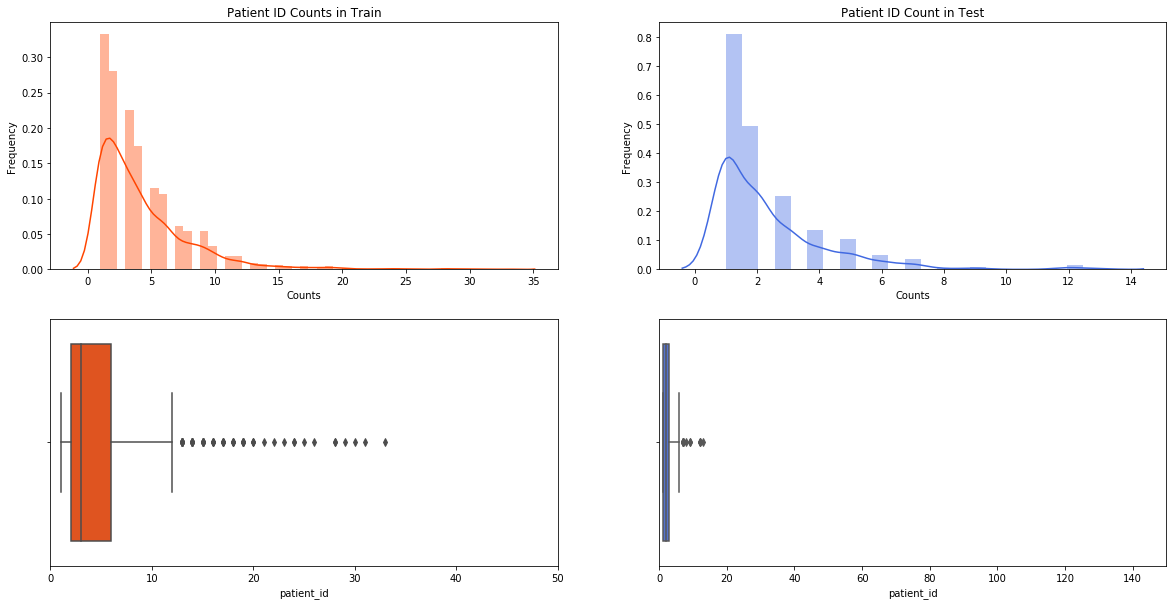

In [30]:
# Visualizing patient count in training and testing datasets to see the image distribution between patients
patient_counts_train = train_data.patient_id.value_counts()
patient_counts_test = test_data.patient_id.value_counts()

fig, ax = plt.subplots(2,2,figsize=(20,10))

sns.distplot(patient_counts_train, ax=ax[0,0], color="orangered", kde=True);
ax[0,0].set_xlabel("Counts")
ax[0,0].set_ylabel("Frequency")
ax[0,0].set_title("Patient ID Counts in Train");

sns.distplot(patient_counts_test, ax=ax[0,1], color="royalblue", kde=True);
ax[0,1].set_xlabel("Counts")
ax[0,1].set_ylabel("Frequency")
ax[0,1].set_title("Patient ID Count in Test");

sns.boxplot(patient_counts_train, ax=ax[1,0], color="orangered");
ax[1,0].set_xlim(0, 50)
sns.boxplot(patient_counts_test, ax=ax[1,1], color="royalblue");
ax[1,1].set_xlim(0, 150);

### Observations:

In [31]:
print('Most of the patients in training dataset have around',np.quantile(patient_counts_train, 0.75)-np.quantile(patient_counts_train, 0.25), 'images')
print()
print('Most of the patients in testing dataset have around',np.quantile(patient_counts_test, 0.75)-np.quantile(patient_counts_test, 0.25), 'images')
print()
print('The maximum number of images per patient in training dataset is', patient_counts_train.max())
print()
print('The maximum number of images per patient in training dataset is', patient_counts_test.max())
print()

Most of the patients in training dataset have around 4.0 images

Most of the patients in testing dataset have around 2.0 images

The maximum number of images per patient in training dataset is 33

The maximum number of images per patient in training dataset is 13



## Part 4C: Gender Counts

In [32]:
# Counts of Male and Female Patients in Training Dataset
M = train_data[(train_data['sex'] == 'male')]
F = train_data[(train_data['sex'] == 'female' )]


trace = go.Bar( x = ['male', 'female'], y = (len(M), len(F)), orientation = 'v', opacity = 0.8, marker=dict(
        color=[ 'royalblue', 'orangered'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Gender Counts in Training Dataset')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [33]:
M = test_data[(test_data['sex'] == 'male')]
F = test_data[(test_data['sex'] == 'female' )]


trace = go.Bar( x = ['male', 'female'], y = (len(M), len(F)), orientation = 'v', opacity = 0.8, marker=dict(
        color=[ 'royalblue', 'orangered'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Gender Counts in Testing Dataset', )
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

## Part 4D: Age Distribution

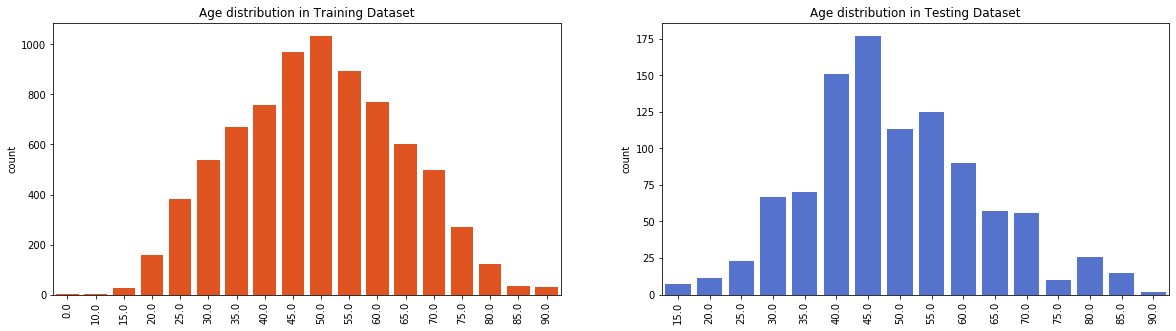

In [34]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(train_data.age_approx, color="orangered", ax=ax[0]);
labels = ax[0].get_xticklabels();
ax[0].set_xticklabels(labels, rotation=90);
ax[0].set_xlabel("");
ax[0].set_title("Age distribution in Training Dataset");

sns.countplot(test_data.age_approx, color="royalblue", ax=ax[1]);
labels = ax[1].get_xticklabels();
ax[1].set_xticklabels(labels, rotation=90);
ax[1].set_xlabel("");
ax[1].set_title("Age distribution in Testing Dataset");

### Observation: Most of the patients are between age of 40-60 in both datasets

## Part 4E: Scan by Anatom Site

In [35]:
# Instead of a typical bar chart, I found treemaps especially useful and creative for our dataset
# Setting up color palette
orange_black = [
    '#fdc029', '#df861d', '#FF6347', '#aa3d01', '#a30e15', '#800000', '#171820'
]

# Setting plot styling.
plt.style.use('ggplot')

cntstr = train_data.anatom_site_general_challenge.value_counts().rename_axis('location').reset_index(
    name='count')

fig = px.treemap(cntstr,
                 path=['location'],
                 values='count',
                 color='count',
                 color_continuous_scale=orange_black,
                 title='Scans by Anatom Site General Challenge - Train Data')

fig.update_traces(textinfo='label+percent entry')
fig.show()

In [36]:
# Instead of a typical bar chart, I found treemaps especially useful and creative for our dataset
# Setting up color palette
orange_black = [
    '#fdc029', '#df861d', '#FF6347', '#aa3d01', '#a30e15', '#800000', '#171820'
]

# Setting plot styling.
plt.style.use('ggplot')

cntstr = test_data.anatom_site_general_challenge.value_counts().rename_axis('location').reset_index(
    name='count')

fig = px.treemap(cntstr,
                 path=['location'],
                 values='count',
                 color='count',
                 color_continuous_scale=orange_black,
                 title='Scans by Anatom Site General Challenge - Train Data')

fig.update_traces(textinfo='label+percent entry')
fig.show()

### Observation: Most of the images are concentrated on torso and lower extremity (for both training and testing dataset

## Part 4F: Sunburst Chart: Getting more detailed information

In [37]:
fig = px.sunburst(data_frame=train_data,
                  path=['benign_malignant', 'sex', 'anatom_site_general_challenge'],
                  color='sex',
                  color_discrete_sequence=orange_black,
                  maxdepth=-1,
                  title='Sunburst Chart Benign/Malignant > Sex > Location')

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()

### Observations:
Above Sunburst figure provided really useful information about our training data. By just simply looking at it we can conclude that:


1) In both malignant and benign cases, male patients have the greater proportion. In terms of gender, data is balanced. 

2) In both male and female patients, most of the images taken (benign cases) are from the torso area (male=55%, female=48%)


## Part 4G: Additionally, it is fairly important to analyze the age-gender impact on the status of the tumor (malignant or benign). 

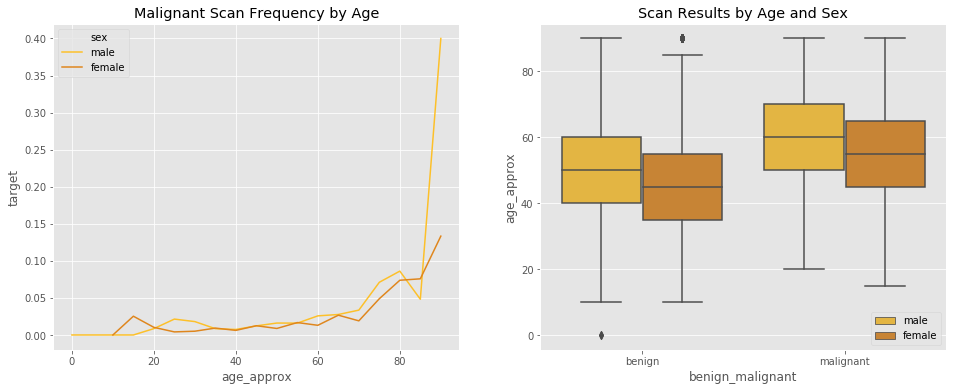

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.lineplot(x='age_approx',
             y='target',
             data=train_data_imb,
             ax=ax[0],
             hue='sex',
             palette=orange_black[:2],
             ci=None)
sns.boxplot(x='benign_malignant',
            y='age_approx',
            data=train_data_imb,
            ax=ax[1],
            hue='sex',
            palette=orange_black)

plt.legend(loc='lower right')

ax[0].set_title('Malignant Scan Frequency by Age')
ax[1].set_title('Scan Results by Age and Sex')

plt.show()

### Observation: As expected after a certain age, age of 60 (this number also takes into account the distribution), in both male and female patient population the risk of tumor being malignant is extremely high. 

## Part 5: Working with the image files

## Part 5A: Function to get the image

## References for Part 5 and 6:
https://www.kaggle.com/anshuls235/siim-isic-melanoma-analysis-eda-prediction/notebook#3.-Exploratory-Data-Analysis
https://www.kaggle.com/akashram/dimensional-reduction-techniques-baseline-rf 

In [39]:
#Specifying image paths for training and testing dataset
train_img_path = '../Kaggle_Cancer_Dataset/jpeg/train/'
test_img_path = '../Kaggle_Cancer_Dataset/jpeg/test/'

In [40]:
# Function to read the image from either training or testing dataset
def get_image(img_name,is_train=True):
    if is_train:
        path = '../Kaggle_Cancer_Dataset/jpeg/train/'
    else:
        path = '../Kaggle_Cancer_Dataset/jpeg/test/'
        
    path = os.path.join(path,img_name + '.jpg')
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [41]:
# Function to display multiple Melanoma images
def show_data(df,rows,cols,is_train=True):
    df.reset_index(inplace=True,drop=True) 
    fig = plt.figure(figsize=(6,6),dpi=150)
    i = 1
    for r in range(rows):
        for c in range(cols):
            image_name = df.loc[i-1,'image_name']
            title = 'Patient id: '+ df.loc[i-1,'patient_id']+ '\n'\
              +'Site: '+str(df.loc[i-1,'anatom_site_general_challenge'])+'\n'\
              +'Sex: '+str(df.loc[i-1,'sex'])+'\n'\
              +'Approximate Age: '+str(int(df.loc[i-1,'age_approx']))
            ax = fig.add_subplot(rows,cols,i)
            img = get_image(image_name,is_train)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(title,fontsize=5)
            ax.imshow(img)
            i+=1
    return fig

### Initially, some benign Melanoma cases will be plotted. 

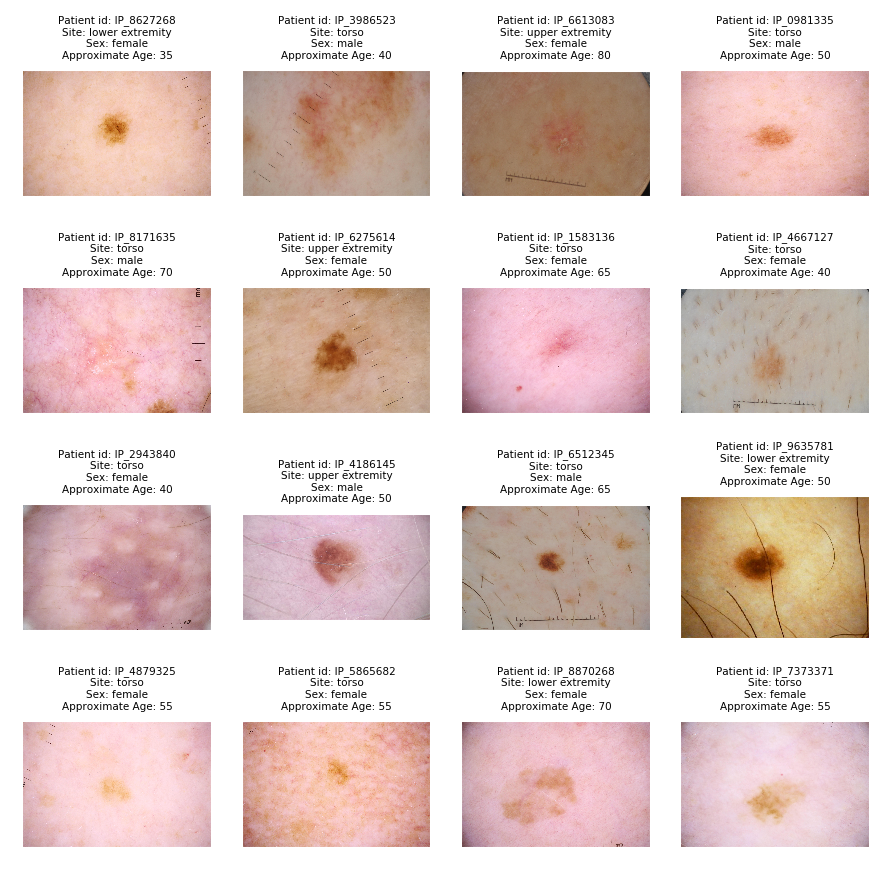

In [42]:
fig = show_data(train_data[train_data['benign_malignant']=='benign'].iloc[:16,:],4,4)
fig.tight_layout()

### Now, let's have a look at some malignant Melanoma Cases

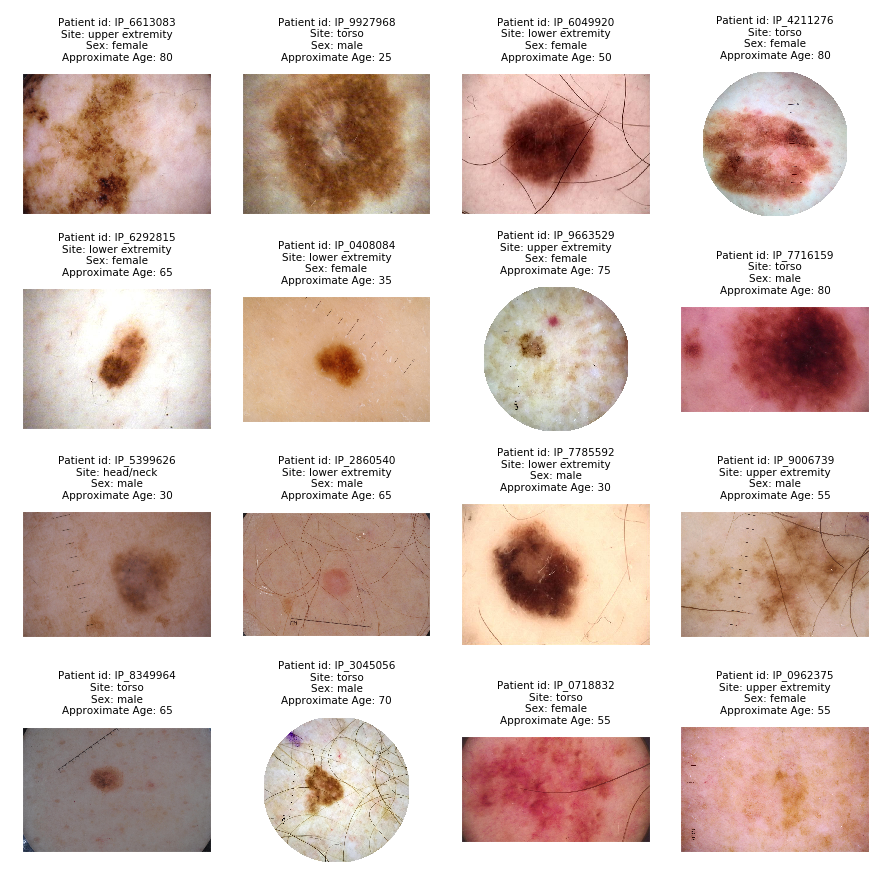

In [43]:
fig = show_data(train_data[train_data['benign_malignant']=='malignant'].iloc[:16,:],4,4)
fig.tight_layout()

### Finally, let's see what we want to predict (test set)

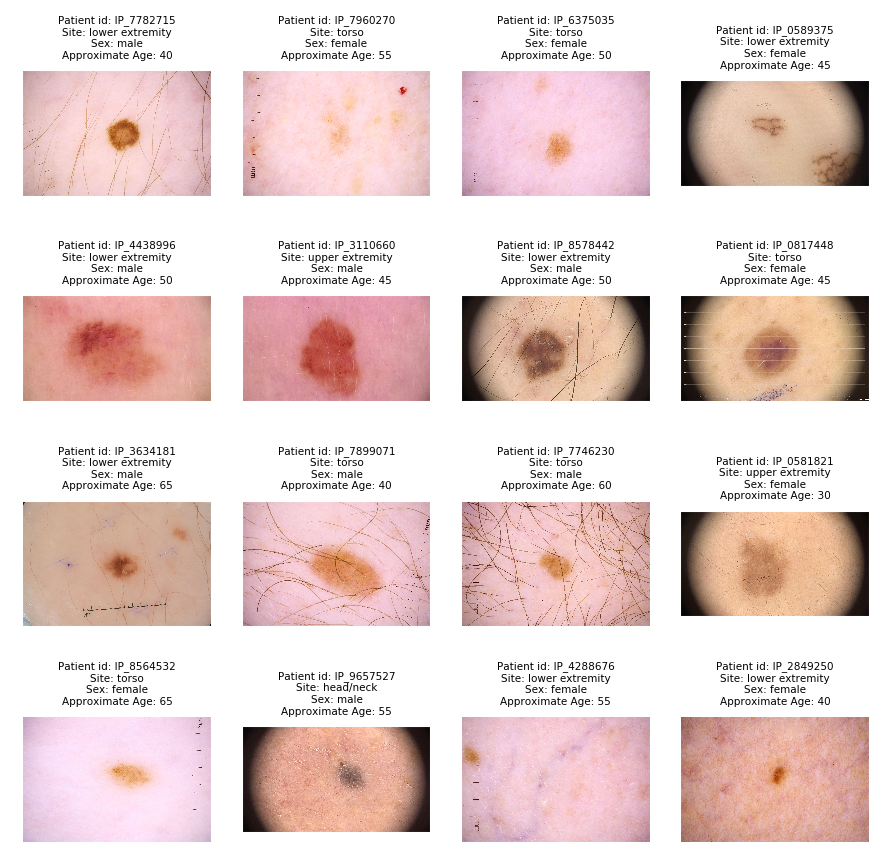

In [44]:
fig = show_data(test_data.iloc[:16,:],4,4, is_train=False)
fig.tight_layout()

## Part 5B: Resizing Images to 256x256
### References: 
https://www.kaggle.com/anshuls235/siim-isic-melanoma-analysis-eda-prediction#3.-Exploratory-Data-Analysis 
https://stackoverflow.com/questions/21517879/python-pil-resize-all-images-in-a-folder
https://stackoverflow.com/questions/31434278/how-do-i-use-python-pil-to-save-an-image-to-a-particular-directory
https://stackoverflow.com/questions/902761/saving-a-numpy-array-as-an-image/19174800

In [45]:
#Size to resize(256,256,3)
#img_size = 256

#Paths to train and test images
train_img_path = '../Kaggle_Cancer_Dataset/jpeg/train/'
test_img_path = '../Kaggle_Cancer_Dataset/jpeg/test/'

#Resizing Function
def resize_image(img, img_dim):
    img_size=img_dim
    old_size = img.shape[:2]
    ratio = float(img_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    img = cv2.resize(img, (new_size[1],new_size[0]))
    delta_w = img_size - new_size[1]
    delta_h = img_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    color = [0,0,0]
    new_img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    return new_img

In [46]:
def load_image(path, img_id, img_dim, is_train=True):
    if is_train:
        save_path='../Kaggle_Cancer_Dataset/resized_train_256/'
        upload_path = os.path.join(save_path, img_id + '.jpg')
    
    else:
        save_path='../Kaggle_Cancer_Dataset/resized_test_256/'
        upload_path = os.path.join(save_path, img_id + '.jpg')
    
    img_size=img_dim
    load_path = os.path.join(path, img_id + '.jpg')
    img = cv2.imread(load_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    new_img = resize_image(img, img_size)
    
    
    saved_image = Image.fromarray(new_img)
    saved_image.save(upload_path, 'JPEG')
    return new_img

In [50]:
train_data.reset_index(inplace=True,drop=True)
train_image_id = train_data.image_name
print(train_image_id.shape)

test_data.reset_index(inplace=True,drop=True)
test_image_id = test_data.image_name
print(test_image_id.shape)

(7762,)
(1000,)


In [51]:
#Creating Folder for Resized Images
#if first time running code, run the code below to save all resized images in given path(user defined)

train_image_path_resized= '../Kaggle_Cancer_Dataset/resized_train_256/'
os.mkdir(train_image_path_resized)

i=0
for i in range(train_image_id.shape[0]):
    new_image=load_image(train_img_path, train_image_id.loc[i], img_dim=256, is_train=True)
    i+=1

In [1]:
#Creating Folder for Resized Images
#if first time running code, run the code below to save all resized images in given path(user defined)

test_image_path_resized= '../Kaggle_Cancer_Dataset/resized_test_256/'
os.mkdir(test_image_path_resized)

i=0
for i in range(test_image_id.shape[0]):
    new_image=load_image(test_img_path, test_image_id.loc[i], img_dim=256, is_train=False)
    i+=1

In [53]:
# Function to read the resized images
def get_resized_image(img_name,is_train=True):
    
    if is_train:
        path = '../Kaggle_Cancer_Dataset/resized_train_256/'
    else:
        path = '../Kaggle_Cancer_Dataset/resized_test_256/'
        
    path = os.path.join(path,img_name + '.jpg')
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [54]:
# Function to display multiple resized Melanoma images
def show_resized_data(df,rows,cols,is_train=True):
    df.reset_index(inplace=True,drop=True) 
    fig = plt.figure(figsize=(6,6),dpi=150)
    i = 1
    for r in range(rows):
        for c in range(cols):
            image_name = df.loc[i-1,'image_name']
            title = 'Patient id: '+ df.loc[i-1,'patient_id']+ '\n'\
              +'Site: '+str(df.loc[i-1,'anatom_site_general_challenge'])+'\n'\
              +'Sex: '+str(df.loc[i-1,'sex'])+'\n'\
              +'Approximate Age: '+str(int(df.loc[i-1,'age_approx']))
            ax = fig.add_subplot(rows,cols,i)
            img = get_resized_image(image_name,is_train)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(title,fontsize=5)
            ax.imshow(img)
            i+=1
    return fig

## Now, let's plot some resized benign images from our training dataset

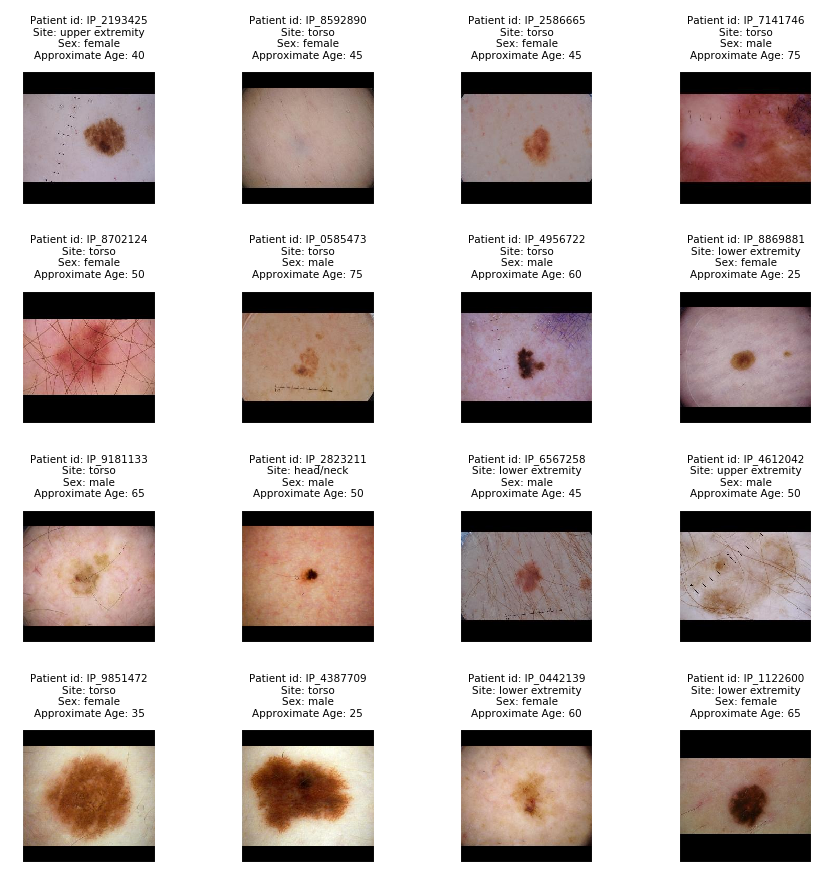

In [97]:
fig = show_resized_data(train_data[train_data['benign_malignant']=='benign'].iloc[:16,:],4,4, is_train=True)
fig.tight_layout()

## Next, resized malignant images from our training dataset will be plotted

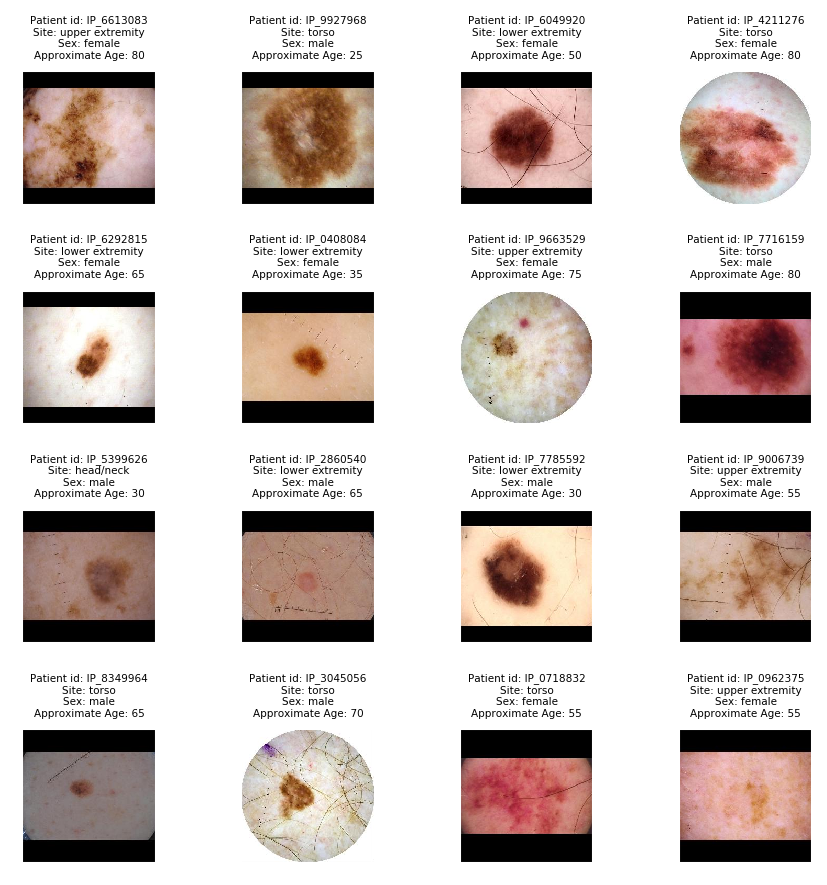

In [64]:
fig = show_resized_data(train_data[train_data['benign_malignant']=='malignant'].iloc[:16,:],4,4, is_train=True)
fig.tight_layout()

## Finally, some of our testing data images will be plotted. 

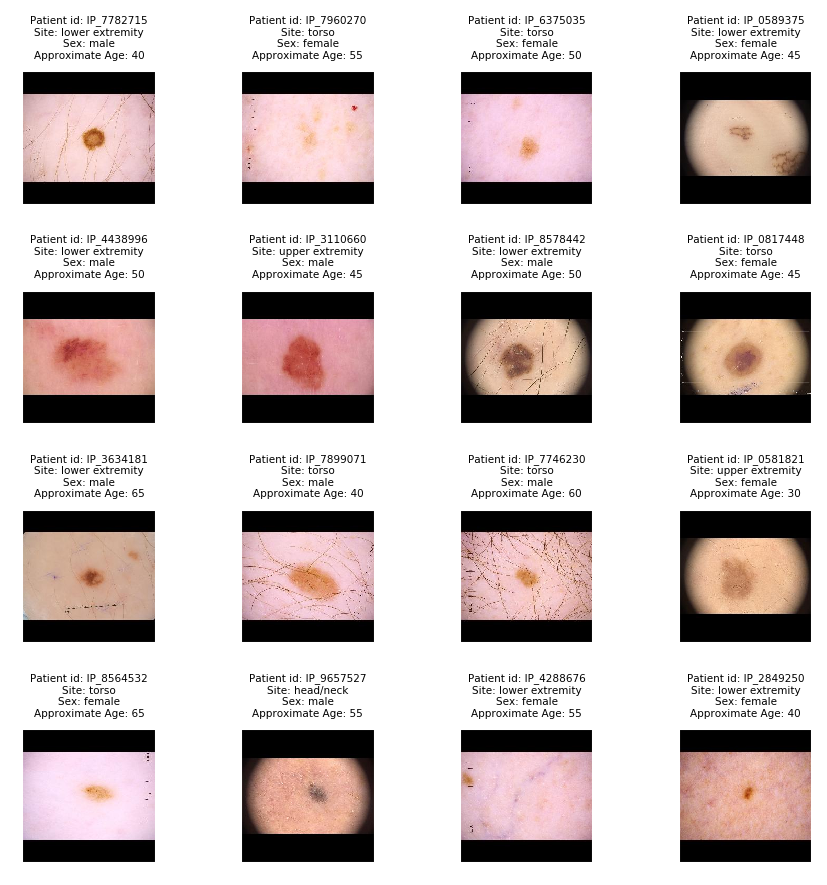

In [58]:
fig = show_resized_data(test_data.iloc[:16,:],4,4, is_train=False)
fig.tight_layout()

## Part 6: Feature Extraction with Principal Component Analysis
## At this stage our arrays, dataframes will be extremely large. I have added a sample code just indicate the extent of their size.
## Hence, if at some stage, the model returns 'unable to allocate memory' error, please use the reference below to solve the issue. 

## Reference:
## https://stackoverflow.com/questions/57507832/unable-to-allocate-array-with-shape-and-data-type

In [253]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('scaled_flat_train_images_df', 12208570520),
 ('scaled_flat_train_images', 12208570480),
 ('scaled_flat_test_images_df', 1572864152),
 ('scaled_flat_test_images', 1572864112),
 ('flat_train_images_df', 1526071448),
 ('train_images_array', 1526071440),
 ('x_t', 1526071440),
 ('flat_train_images', 1526071408),
 ('flat_test_images_df', 196608152),
 ('test_images_array', 196608144),
 ('y_t', 196608144),
 ('flat_test_images', 196608112),
 ('train_data_imb', 15665609),
 ('train_df', 14331817),
 ('train_data', 3366751),
 ('B', 3169413),
 ('test_df', 2975144),
 ('feat_cols', 1671792),
 ('feat_cols_test', 1671792),
 ('fin_scaled_data_train', 1179976),
 ('real_labels', 845766),
 ('real_labels_x', 845766),
 ('principal_cancer_pca_Df_train', 621112),
 ('scaled_train_csv_df', 559016),
 ('train_image_id', 535730),
 ('X_rus', 496880),
 ('intermediate_df_test', 272340),
 ('intermediate_df_test_prob', 272340),
 ('test_data', 272340),
 ('fin', 196752),
 ('img_xx', 196736),
 ('new_image', 196736),
 ('n

## For instance, the first dataframe and array are around 24 GB in size in total. 

## Part 6A: Collecting all images in an array with (N, 256, 256, 3) dimensions

In [56]:
def load_resized_image(img_id, is_train=True):
    if is_train:
        path='../Kaggle_Cancer_Dataset/resized_train_256/'
    else:
        path='../Kaggle_Cancer_Dataset/resized_test_256/'

    load_path = os.path.join(path, img_id + '.jpg')
    img = cv2.imread(load_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img

In [57]:
train_data.reset_index(inplace=True,drop=True)
train_image_id = train_data.image_name
print(train_image_id.shape)

(7762,)


In [58]:
train_data.tail()

image_name  patient_id     sex  age_approx  \
7757  ISIC_4253348  IP_3048629    male        55.0   
7758  ISIC_9576957  IP_3203470  female        50.0   
7759  ISIC_2075546  IP_7743081  female        50.0   
7760  ISIC_5561003  IP_8020102    male        45.0   
7761  ISIC_5074160  IP_1348848    male        60.0   

     anatom_site_general_challenge diagnosis benign_malignant  target  
7757                         torso   unknown           benign     0.0  
7758               upper extremity   unknown           benign     0.0  
7759               lower extremity     nevus           benign     0.0  
7760               lower extremity  melanoma        malignant     1.0  
7761                         torso   unknown           benign     0.0

In [59]:
train_image_id.loc[:7761]

0       ISIC_2006783
1       ISIC_5013602
2       ISIC_8961394
3       ISIC_4025918
4       ISIC_7836872
            ...     
7757    ISIC_4253348
7758    ISIC_9576957
7759    ISIC_2075546
7760    ISIC_5561003
7761    ISIC_5074160
Name: image_name, Length: 7762, dtype: object

In [60]:
train_image_id[:7762]

0       ISIC_2006783
1       ISIC_5013602
2       ISIC_8961394
3       ISIC_4025918
4       ISIC_7836872
            ...     
7757    ISIC_4253348
7758    ISIC_9576957
7759    ISIC_2075546
7760    ISIC_5561003
7761    ISIC_5074160
Name: image_name, Length: 7762, dtype: object

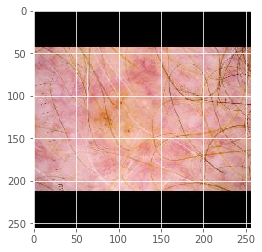

In [61]:
img_xx=load_resized_image(train_image_id.loc[7761], is_train=True)
temp2 = []
temp2.append(img_xx)
fin = np.stack(temp2)
imgplot = plt.imshow(img_xx)
plt.show()

In [62]:
i=0
resized_train_path='../Kaggle_Cancer_Dataset/resized_train_256/'
resized_test_path='../Kaggle_Cancer_Dataset/resized_test_256/'

temp_train = []

for i in range(train_image_id.loc[:7761].shape[0]):
    new_image_train=load_resized_image(train_image_id[:7762].loc[i], is_train=True)
    temp_train.append(new_image_train)
    i+=1
    
train_images_array = np.stack(temp_train)

In [63]:
train_images_array.shape

(7762, 256, 256, 3)

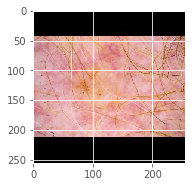

In [64]:
# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(train_images_array[7761], (256,256,3))
plt.imshow(curr_img)

In [65]:
test_data.reset_index(inplace=True,drop=True)
test_image_id = test_data.image_name
print(test_image_id.shape)

(1000,)


In [66]:
test_image_id.loc[:999]

0      ISIC_0052349
1      ISIC_0058510
2      ISIC_0073313
3      ISIC_0073502
4      ISIC_0074618
           ...     
995    ISIC_0997441
996    ISIC_0998106
997    ISIC_0998563
998    ISIC_0998993
999    ISIC_0999078
Name: image_name, Length: 1000, dtype: object

In [67]:
test_image_id[:1000]

0      ISIC_0052349
1      ISIC_0058510
2      ISIC_0073313
3      ISIC_0073502
4      ISIC_0074618
           ...     
995    ISIC_0997441
996    ISIC_0998106
997    ISIC_0998563
998    ISIC_0998993
999    ISIC_0999078
Name: image_name, Length: 1000, dtype: object

In [68]:
i=0
resized_train_path='../Kaggle_Cancer_Dataset/resized_train_256/'
resized_test_path='../Kaggle_Cancer_Dataset/resized_test_256/'

temp_test = []

for i in range(test_image_id.loc[:999].shape[0]):
    new_image_test=load_resized_image(test_image_id[:1000].loc[i], is_train=False)
    temp_test.append(new_image_test)
    i+=1
    
test_images_array = np.stack(temp_test)

In [69]:
test_images_array.shape

(1000, 256, 256, 3)

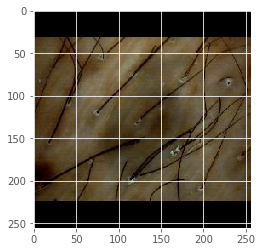

In [70]:
img_xx=load_resized_image(test_image_id.loc[999], is_train=False)
temp2 = []
temp2.append(img_xx)
fin = np.stack(temp2)
imgplot = plt.imshow(img_xx)
plt.show()

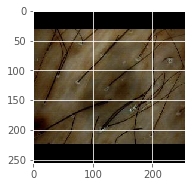

In [71]:
# Display the first image in test data
plt.subplot(121)
curr_img = np.reshape(test_images_array[999], (256,256,3))
plt.imshow(curr_img)

## Part 6B: Standardizing Train and Test CSV Table and Pixels (Also Merging)

## Part 6B1: Standardizing Pixels
## References:
https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

In [72]:
#del x_t
#del flat_train_images_list
#del flat_train_images
#del flat_train_images_df

#del names
#del scaled_flat_train_images
#del scaled_flat_train_images_df

In [73]:
x_t=train_images_array
x_t.shape

(7762, 256, 256, 3)

In [74]:
y_t=test_images_array
y_t.shape

(1000, 256, 256, 3)

In [75]:
i=0
flat_train_images_list = []
for i in range(x_t.shape[0]):
    img = x_t[i].flatten()
    flat_train_images_list.append(img)
    i+=1
flat_train_images = np.array(flat_train_images_list)

In [76]:
i=0
flat_test_images_list = []
for i in range(y_t.shape[0]):
    img = y_t[i].flatten()
    flat_test_images_list.append(img)
    i+=1
flat_test_images = np.array(flat_test_images_list)

In [260]:
flat_train_images.shape

(7762, 196608)

In [259]:
flat_test_images.shape

(1000, 196608)

In [79]:
feat_cols = ['Pixel '+str(i) for i in range(flat_train_images.shape[1])]
flat_train_images_df = pd.DataFrame(flat_train_images,columns=feat_cols)

In [80]:
feat_cols_test = ['Pixel '+str(i) for i in range(flat_test_images.shape[1])]
flat_test_images_df = pd.DataFrame(flat_test_images,columns=feat_cols_test)

In [261]:
flat_train_images_df

Pixel 0  Pixel 1  Pixel 2  Pixel 3  Pixel 4  Pixel 5  Pixel 6  Pixel 7  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
7757        0        0        0        0        0        0        0        0   
7758        0        0        0        0        0        0        0        0   
7759        0        0        0        0        0        0        0        0   
7760        0        0        0        0        0        0        0        0   
7761        0        0        0        0        0        0        0        0   

      Pixel 8  Pixel 9  ...  Pixel 196598  Pixel 196599  Pixel 196600  \
0           0        0  ...             0             0             0   
1           0        0  ...             0             0             0   
2           0        0  ...             0             0             0   
3           0        0  ...             0             0             0   
4           0        0  ...             0             0             0   
...       ...      ...  ...           ...           ...           ...   
7757        0        0  ...             0             0             0   
7758        0        0  ...             0             0             0   
7759        0        0  ...             0             0             0   
7760        0        0  ...             0             0             0   
7761        0        0  ...             0             0             0   

      Pixel 196601  Pixel 196602  Pixel 196603  Pixel 196604  Pixel 196605  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
7757             0             0             0             0             0   
7758             0             0             0             0             0   
7759             0             0             0             0             0   
7760             0             0             0             0             0   
7761             0             0             0             0             0   

      Pixel 196606  Pixel 196607  
0                0             0  
1                0             0  
2                0             0  
3                0             0  
4                0             0  
...            ...           ...  
7757             0             0  
7758             0             0  
7759             0             0  
7760             0             0  
7761             0             0  

[7762 rows x 196608 columns]

In [82]:
flat_test_images_df

Pixel 0  Pixel 1  Pixel 2  Pixel 3  Pixel 4  Pixel 5  Pixel 6  Pixel 7  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
995        0        0        0        0        0        0        0        0   
996        0        0        0        0        0        0        0        0   
997        0        0        0        0        0        0        0        0   
998        0        0        0        0        0        0        0        0   
999        0        0        0        0        0        0        0        0   

     Pixel 8  Pixel 9  ...  Pixel 196598  Pixel 196599  Pixel 196600  \
0          0        0  ...             0             0             0   
1          0        0  ...             0             0             0   
2          0        0  ...             0             0             0   
3          0        0  ...             0             0             0   
4          0        0  ...             0             0             0   
..       ...      ...  ...           ...           ...           ...   
995        0        0  ...             0             0             0   
996        0        0  ...             0             0             0   
997        0        0  ...             0             0             0   
998        0        0  ...             0             0             0   
999        0        0  ...             0             0             0   

     Pixel 196601  Pixel 196602  Pixel 196603  Pixel 196604  Pixel 196605  \
0               0             0             0             0             0   
1               0             0             0             0             0   
2               0             0             0             0             0   
3               0             0             0             0             0   
4               0             0             0             0             0   
..            ...           ...           ...           ...           ...   
995             0             0             0             0             0   
996             0             0             0             0             0   
997             0             0             0             0             0   
998             0             0             0             0             0   
999             0             0             0             0             0   

     Pixel 196606  Pixel 196607  
0               0             0  
1               0             0  
2               0             0  
3               0             0  
4               0             0  
..            ...           ...  
995             0             0  
996             0             0  
997             0             0  
998             0             0  
999             0             0  

[1000 rows x 196608 columns]

In [83]:
#max_flat_train_images=flat_train_images_df.max()
#max_flat_train_images.head()
#del max_flat_train_images

In [84]:
#min_flat_train_images=flat_train_images_df.min()
#min_flat_train_images.head()
#del min_flat_train_images

In [85]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()
names = flat_train_images_df.columns

scaled_flat_train_images = scaler.fit_transform(flat_train_images_df)
scaled_flat_train_images_df = pd.DataFrame(scaled_flat_train_images, columns=names)

In [86]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler_test = preprocessing.StandardScaler()
names_test = flat_test_images_df.columns

scaled_flat_test_images = scaler_test.fit_transform(flat_test_images_df)
scaled_flat_test_images_df = pd.DataFrame(scaled_flat_test_images, columns=names_test)

In [87]:
scaled_flat_train_images_df

Pixel 0   Pixel 1   Pixel 2   Pixel 3   Pixel 4   Pixel 5   Pixel 6  \
0    -0.079433 -0.078391 -0.078204 -0.079741 -0.078715 -0.078547 -0.079969   
1    -0.079433 -0.078391 -0.078204 -0.079741 -0.078715 -0.078547 -0.079969   
2    -0.079433 -0.078391 -0.078204 -0.079741 -0.078715 -0.078547 -0.079969   
3    -0.079433 -0.078391 -0.078204 -0.079741 -0.078715 -0.078547 -0.079969   
4    -0.079433 -0.078391 -0.078204 -0.079741 -0.078715 -0.078547 -0.079969   
...        ...       ...       ...       ...       ...       ...       ...   
7757 -0.079433 -0.078391 -0.078204 -0.079741 -0.078715 -0.078547 -0.079969   
7758 -0.079433 -0.078391 -0.078204 -0.079741 -0.078715 -0.078547 -0.079969   
7759 -0.079433 -0.078391 -0.078204 -0.079741 -0.078715 -0.078547 -0.079969   
7760 -0.079433 -0.078391 -0.078204 -0.079741 -0.078715 -0.078547 -0.079969   
7761 -0.079433 -0.078391 -0.078204 -0.079741 -0.078715 -0.078547 -0.079969   

       Pixel 7   Pixel 8   Pixel 9  ...  Pixel 196598  Pixel 196599  \
0    -0.078936 -0.078847 -0.079946  ...     -0.064162      -0.06496   
1    -0.078936 -0.078847 -0.079946  ...     -0.064162      -0.06496   
2    -0.078936 -0.078847 -0.079946  ...     -0.064162      -0.06496   
3    -0.078936 -0.078847 -0.079946  ...     -0.064162      -0.06496   
4    -0.078936 -0.078847 -0.079946  ...     -0.064162      -0.06496   
...        ...       ...       ...  ...           ...           ...   
7757 -0.078936 -0.078847 -0.079946  ...     -0.064162      -0.06496   
7758 -0.078936 -0.078847 -0.079946  ...     -0.064162      -0.06496   
7759 -0.078936 -0.078847 -0.079946  ...     -0.064162      -0.06496   
7760 -0.078936 -0.078847 -0.079946  ...     -0.064162      -0.06496   
7761 -0.078936 -0.078847 -0.079946  ...     -0.064162      -0.06496   

      Pixel 196600  Pixel 196601  Pixel 196602  Pixel 196603  Pixel 196604  \
0        -0.064073      -0.06398     -0.066923       -0.0661     -0.065991   
1        -0.064073      -0.06398     -0.066923       -0.0661     -0.065991   
2        -0.064073      -0.06398     -0.066923       -0.0661     -0.065991   
3        -0.064073      -0.06398     -0.066923       -0.0661     -0.065991   
4        -0.064073      -0.06398     -0.066923       -0.0661     -0.065991   
...            ...           ...           ...           ...           ...   
7757     -0.064073      -0.06398     -0.066923       -0.0661     -0.065991   
7758     -0.064073      -0.06398     -0.066923       -0.0661     -0.065991   
7759     -0.064073      -0.06398     -0.066923       -0.0661     -0.065991   
7760     -0.064073      -0.06398     -0.066923       -0.0661     -0.065991   
7761     -0.064073      -0.06398     -0.066923       -0.0661     -0.065991   

      Pixel 196605  Pixel 196606  Pixel 196607  
0        -0.064898     -0.064041     -0.063924  
1        -0.064898     -0.064041     -0.063924  
2        -0.064898     -0.064041     -0.063924  
3        -0.064898     -0.064041     -0.063924  
4        -0.064898     -0.064041     -0.063924  
...            ...           ...           ...  
7757     -0.064898     -0.064041     -0.063924  
7758     -0.064898     -0.064041     -0.063924  
7759     -0.064898     -0.064041     -0.063924  
7760     -0.064898     -0.064041     -0.063924  
7761     -0.064898     -0.064041     -0.063924  

[7762 rows x 196608 columns]

In [88]:
scaled_flat_test_images_df

Pixel 0   Pixel 1   Pixel 2   Pixel 3   Pixel 4   Pixel 5   Pixel 6  \
0   -0.068187 -0.067233 -0.067156 -0.068164 -0.067199 -0.067158 -0.068237   
1   -0.068187 -0.067233 -0.067156 -0.068164 -0.067199 -0.067158 -0.068237   
2   -0.068187 -0.067233 -0.067156 -0.068164 -0.067199 -0.067158 -0.068237   
3   -0.068187 -0.067233 -0.067156 -0.068164 -0.067199 -0.067158 -0.068237   
4   -0.068187 -0.067233 -0.067156 -0.068164 -0.067199 -0.067158 -0.068237   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.068187 -0.067233 -0.067156 -0.068164 -0.067199 -0.067158 -0.068237   
996 -0.068187 -0.067233 -0.067156 -0.068164 -0.067199 -0.067158 -0.068237   
997 -0.068187 -0.067233 -0.067156 -0.068164 -0.067199 -0.067158 -0.068237   
998 -0.068187 -0.067233 -0.067156 -0.068164 -0.067199 -0.067158 -0.068237   
999 -0.068187 -0.067233 -0.067156 -0.068164 -0.067199 -0.067158 -0.068237   

      Pixel 7   Pixel 8   Pixel 9  ...  Pixel 196598  Pixel 196599  \
0   -0.067365 -0.067178 -0.068465  ...     -0.060061     -0.060683   
1   -0.067365 -0.067178 -0.068465  ...     -0.060061     -0.060683   
2   -0.067365 -0.067178 -0.068465  ...     -0.060061     -0.060683   
3   -0.067365 -0.067178 -0.068465  ...     -0.060061     -0.060683   
4   -0.067365 -0.067178 -0.068465  ...     -0.060061     -0.060683   
..        ...       ...       ...  ...           ...           ...   
995 -0.067365 -0.067178 -0.068465  ...     -0.060061     -0.060683   
996 -0.067365 -0.067178 -0.068465  ...     -0.060061     -0.060683   
997 -0.067365 -0.067178 -0.068465  ...     -0.060061     -0.060683   
998 -0.067365 -0.067178 -0.068465  ...     -0.060061     -0.060683   
999 -0.067365 -0.067178 -0.068465  ...     -0.060061     -0.060683   

     Pixel 196600  Pixel 196601  Pixel 196602  Pixel 196603  Pixel 196604  \
0       -0.059782     -0.059011     -0.062085      -0.06127     -0.060513   
1       -0.059782     -0.059011     -0.062085      -0.06127     -0.060513   
2       -0.059782     -0.059011     -0.062085      -0.06127     -0.060513   
3       -0.059782     -0.059011     -0.062085      -0.06127     -0.060513   
4       -0.059782     -0.059011     -0.062085      -0.06127     -0.060513   
..            ...           ...           ...           ...           ...   
995     -0.059782     -0.059011     -0.062085      -0.06127     -0.060513   
996     -0.059782     -0.059011     -0.062085      -0.06127     -0.060513   
997     -0.059782     -0.059011     -0.062085      -0.06127     -0.060513   
998     -0.059782     -0.059011     -0.062085      -0.06127     -0.060513   
999     -0.059782     -0.059011     -0.062085      -0.06127     -0.060513   

     Pixel 196605  Pixel 196606  Pixel 196607  
0       -0.060952     -0.060107     -0.059315  
1       -0.060952     -0.060107     -0.059315  
2       -0.060952     -0.060107     -0.059315  
3       -0.060952     -0.060107     -0.059315  
4       -0.060952     -0.060107     -0.059315  
..            ...           ...           ...  
995     -0.060952     -0.060107     -0.059315  
996     -0.060952     -0.060107     -0.059315  
997     -0.060952     -0.060107     -0.059315  
998     -0.060952     -0.060107     -0.059315  
999     -0.060952     -0.060107     -0.059315  

[1000 rows x 196608 columns]

In [128]:
#PCA for train_images
from sklearn.decomposition import PCA
pca_cancer_train = PCA(n_components=10)
pca_result_train = pca_cancer_train.fit_transform(scaled_flat_train_images_df)

In [129]:
print('Explained variation per principal component: {}'.format(pca_cancer_train.explained_variance_ratio_))

Explained variation per principal component: [0.43854237 0.24549425 0.08953732 0.04225073 0.02693517 0.02021201
 0.01238751 0.00872824 0.00794894 0.00675067]


In [207]:
principal_cancer_pca_Df_train = pd.DataFrame(data = pca_result_train, columns=['Pixel_PCA_1', 'Pixel_PCA_2', 'Pixel_PCA_3', 'Pixel_PCA_4', 'Pixel_PCA_5', 'Pixel_PCA_6', 'Pixel_PCA_7', 'Pixel_PCA_8', 'Pixel_PCA_9', 'Pixel_PCA_10'])

In [208]:
principal_cancer_pca_Df_train

Pixel_PCA_1  Pixel_PCA_2  Pixel_PCA_3  Pixel_PCA_4  Pixel_PCA_5  \
0      -12.872671   -21.942760   -14.396116    46.663300   118.901998   
1     -105.824023   -38.072080   -40.290878    34.611238     0.472098   
2       76.415334   -28.458979   -29.472336    10.019133    -3.752677   
3     -150.175789   -41.901918   -38.924871    12.575585   -47.725760   
4      265.075428   -27.618628  -133.086280   -76.426099   -13.665902   
...           ...          ...          ...          ...          ...   
7757  -212.380399   -45.173858   -41.486189    34.076576   -45.468936   
7758  -191.307756    38.212880   297.125607   -27.221942  -103.906779   
7759   277.931111   -27.218501  -139.235588   -71.036836   -18.665457   
7760   821.318102   107.911275   338.315183    73.590391   431.009235   
7761   -81.767451   -35.945305   -42.803898    21.213988     6.792606   

      Pixel_PCA_6  Pixel_PCA_7  Pixel_PCA_8  Pixel_PCA_9  Pixel_PCA_10  
0       -2.826159     1.692802   -20.547317   -12.095073    -27.101199  
1      -26.814178   -11.889070    24.420177    10.979735     15.993907  
2     -118.703797    57.622361    39.859225    11.036035      4.268344  
3      -90.089426   -24.043486     0.412583   -16.889859      8.512112  
4       85.599580   -30.535240     1.577004    46.277038     -7.712535  
...           ...          ...          ...          ...           ...  
7757   -45.627224    -6.536464     9.118415    31.027013     -5.141154  
7758    69.147625   -52.280392   -16.100448   -43.828233     -8.070222  
7759    89.937641   -30.345783   -14.756590   -25.187475     35.999733  
7760    17.992640  -370.960676  -125.175665   128.739423     93.243220  
7761   -79.270412    58.802856   -12.740120   -20.388910     44.572989  

[7762 rows x 10 columns]

In [132]:
train_label=train_data['target']
train_label

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7757    0.0
7758    0.0
7759    0.0
7760    1.0
7761    0.0
Name: target, Length: 7762, dtype: float64

In [133]:
#If the PCA_components=3 for training dataset, then run the code below for visualization 
#import plotly.express as px

#pca = pca_cancer_train
#components = pca_result_train

#total_var = pca.explained_variance_ratio_.sum() * 100

#fig = px.scatter_3d(
    #components, x=0, y=1, z=2, color=train_data.benign_malignant,
    #title=f'Total Explained Variance: {total_var:.2f}%',
    #labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
#fig.show()

In [134]:
# PCA for test images
from sklearn.decomposition import PCA
pca_cancer_test = PCA(n_components=10)
pca_result_test = pca_cancer_test.fit_transform(scaled_flat_test_images_df.values)

In [135]:
print('Explained variation per principal component: {}'.format(pca_cancer_test.explained_variance_ratio_))

Explained variation per principal component: [0.38817927 0.24244114 0.11285361 0.06699586 0.030459   0.0162346
 0.01385706 0.01172593 0.01087832 0.00830877]


In [204]:
principal_cancer_pca_Df_test = pd.DataFrame(data = pca_result_test, columns=['Pixel_PCA_1', 'Pixel_PCA_2', 'Pixel_PCA_3', 'Pixel_PCA_4', 'Pixel_PCA_5', 'Pixel_PCA_6', 'Pixel_PCA_7', 'Pixel_PCA_8', 'Pixel_PCA_9', 'Pixel_PCA_10'])

In [205]:
principal_cancer_pca_Df_test

Pixel_PCA_1  Pixel_PCA_2  Pixel_PCA_3  Pixel_PCA_4  Pixel_PCA_5  \
0    -326.689408   -48.500709    -6.716719   -51.951030     8.099878   
1    -405.203452   -54.565337   -20.474326   -49.018334    15.662313   
2    -390.582372   -52.593658   -15.692724   -58.697270    18.343551   
3     182.434094   -43.149116  -292.033624   141.564220    36.152841   
4      55.004726   -35.422268   -37.971459  -110.343441  -175.653077   
..           ...          ...          ...          ...          ...   
995   548.814178    13.468716    86.662656  -143.006312    32.696214   
996   288.141356    -6.926285     5.332663   -36.992396   122.616917   
997   213.393151   -17.390203   -14.398822   -82.094779   -88.403178   
998   186.939478   -41.441762  -260.875574   132.424630   -70.771425   
999   712.108633    77.715842   222.432260    49.583688   217.731554   

     Pixel_PCA_6  Pixel_PCA_7  Pixel_PCA_8  Pixel_PCA_9  Pixel_PCA_10  
0      11.410252    10.323274    19.783656   -30.352750      3.182193  
1      -3.940064     2.576038    -7.167180    -2.768694     -7.226577  
2      38.998721   -14.435681    -3.236449    11.720221     13.151552  
3      32.276985   -49.223261   -22.743340   -51.101338     25.858550  
4      11.577199    13.649508   -65.595592    54.567546     12.723964  
..           ...          ...          ...          ...           ...  
995    39.014915    -4.456022   -15.261244   -75.023473     59.605483  
996  -102.284545    14.477113   -17.485646   -13.676216     19.405345  
997    17.919815   -23.524927    20.868274   106.386091    -96.688662  
998   -16.278784    34.960962    64.364100   -52.951980    -30.380699  
999    54.131013   -60.976032   120.295352   -31.228010     63.109908  

[1000 rows x 10 columns]

In [206]:
#If the PCA_components=3 for test dataset, then run the code below for visualization 
#import plotly.express as px

#pca = pca_cancer_train
#components = pca_result_train

#total_var = pca.explained_variance_ratio_.sum() * 100

#fig = px.scatter_3d(
    #components, x=0, y=1, z=2, color=train_data.benign_malignant,
    #title=f'Total Explained Variance: {total_var:.2f}%',
    #labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
#fig.show()

## Part 6B2: Standardizing CSV file

In [209]:
train_data

image_name  patient_id     sex  age_approx  \
0     ISIC_2006783  IP_6078411    male        30.0   
1     ISIC_5013602  IP_7684360    male        55.0   
2     ISIC_8961394  IP_8806573  female        60.0   
3     ISIC_4025918  IP_0963996  female        40.0   
4     ISIC_7836872  IP_3575311  female        55.0   
...            ...         ...     ...         ...   
7757  ISIC_4253348  IP_3048629    male        55.0   
7758  ISIC_9576957  IP_3203470  female        50.0   
7759  ISIC_2075546  IP_7743081  female        50.0   
7760  ISIC_5561003  IP_8020102    male        45.0   
7761  ISIC_5074160  IP_1348848    male        60.0   

     anatom_site_general_challenge diagnosis benign_malignant  target  
0                            torso   unknown           benign     0.0  
1                  upper extremity   unknown           benign     0.0  
2                            torso   unknown           benign     0.0  
3                  upper extremity   unknown           benign     0.0  
4                  lower extremity     nevus           benign     0.0  
...                            ...       ...              ...     ...  
7757                         torso   unknown           benign     0.0  
7758               upper extremity   unknown           benign     0.0  
7759               lower extremity     nevus           benign     0.0  
7760               lower extremity  melanoma        malignant     1.0  
7761                         torso   unknown           benign     0.0  

[7762 rows x 8 columns]

In [210]:
test_data

image_name  patient_id     sex  age_approx  \
0    ISIC_0052349  IP_7782715    male        40.0   
1    ISIC_0058510  IP_7960270  female        55.0   
2    ISIC_0073313  IP_6375035  female        50.0   
3    ISIC_0073502  IP_0589375  female        45.0   
4    ISIC_0074618  IP_4438996    male        50.0   
..            ...         ...     ...         ...   
995  ISIC_0997441  IP_2277592  female        35.0   
996  ISIC_0998106  IP_2248025    male        70.0   
997  ISIC_0998563  IP_9705190    male        45.0   
998  ISIC_0998993  IP_9736506  female        85.0   
999  ISIC_0999078  IP_8954558  female        25.0   

    anatom_site_general_challenge  
0                 lower extremity  
1                           torso  
2                           torso  
3                 lower extremity  
4                 lower extremity  
..                            ...  
995                         torso  
996               lower extremity  
997                         torso  
998                         torso  
999               lower extremity  

[1000 rows x 5 columns]

In [211]:
interm_df=train_data.copy()
interm_df = interm_df.drop(['image_name', 'patient_id','diagnosis', 'benign_malignant', 'target'],axis = 1)

interm_df = pd.get_dummies(interm_df, columns=['sex'])
interm_df = pd.get_dummies(interm_df, columns=['anatom_site_general_challenge'])
interm_df

age_approx  sex_female  sex_male  \
0           30.0           0         1   
1           55.0           0         1   
2           60.0           1         0   
3           40.0           1         0   
4           55.0           1         0   
...          ...         ...       ...   
7757        55.0           0         1   
7758        50.0           1         0   
7759        50.0           1         0   
7760        45.0           0         1   
7761        60.0           0         1   

      anatom_site_general_challenge_head/neck  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
7757                                        0   
7758                                        0   
7759                                        0   
7760                                        0   
7761                                        0   

      anatom_site_general_challenge_lower extremity  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 1   
...                                             ...   
7757                                              0   
7758                                              0   
7759                                              1   
7760                                              1   
7761                                              0   

      anatom_site_general_challenge_oral/genital  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
7757                                           0   
7758                                           0   
7759                                           0   
7760                                           0   
7761                                           0   

      anatom_site_general_challenge_palms/soles  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
...                                         ...   
7757                                          0   
7758                                          0   
7759                                          0   
7760                                          0   
7761                                          0   

      anatom_site_general_challenge_torso  \
0                                       1   
1                                       0   
2                                       1   
3                                       0   
4                                       0   
...                                   ...   
7757                                    1   
7758                                    0   
7759                                    0   
7760                                    0   
7761                                    1   

      anatom_site_general_challenge_upper extremity  
0                                                 0  
1                                                 1  
2                                                 0  
3                                                 1  
4                                                 0  
...                                             ...  
7757                                              0  
7758                                    

In [212]:
interm_df_test=test_data.copy()
interm_df_test = interm_df_test.drop(['image_name', 'patient_id'],axis = 1)

interm_df_test = pd.get_dummies(interm_df_test, columns=['sex'])
interm_df_test = pd.get_dummies(interm_df_test, columns=['anatom_site_general_challenge'])
interm_df_test

age_approx  sex_female  sex_male  \
0          40.0           0         1   
1          55.0           1         0   
2          50.0           1         0   
3          45.0           1         0   
4          50.0           0         1   
..          ...         ...       ...   
995        35.0           1         0   
996        70.0           0         1   
997        45.0           0         1   
998        85.0           1         0   
999        25.0           1         0   

     anatom_site_general_challenge_head/neck  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
..                                       ...   
995                                        0   
996                                        0   
997                                        0   
998                                        0   
999                                        0   

     anatom_site_general_challenge_lower extremity  \
0                                                1   
1                                                0   
2                                                0   
3                                                1   
4                                                1   
..                                             ...   
995                                              0   
996                                              1   
997                                              0   
998                                              0   
999                                              1   

     anatom_site_general_challenge_oral/genital  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
..                                          ...   
995                                           0   
996                                           0   
997                                           0   
998                                           0   
999                                           0   

     anatom_site_general_challenge_palms/soles  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
..                                         ...   
995                                          0   
996                                          0   
997                                          0   
998                                          0   
999                                          0   

     anatom_site_general_challenge_torso  \
0                                      0   
1                                      1   
2                                      1   
3                                      0   
4                                      0   
..                                   ...   
995                                    1   
996                                    0   
997                                    1   
998                                    1   
999                                    0   

     anatom_site_general_challenge_upper extremity  
0                                                0  
1                                                0  
2                                                0  
3                                                0  
4                                                0  
..                                             ...  
995                                              0  
996                                              0  
997                                              0  
998          

In [213]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler_csv = preprocessing.StandardScaler()
names = interm_df.columns

scaled_train_csv = scaler_csv.fit_transform(interm_df)
scaled_train_csv_df = pd.DataFrame(scaled_train_csv, columns=names)

In [214]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler_csv_test = preprocessing.StandardScaler()
names_test = interm_df_test.columns

scaled_test_csv = scaler_csv_test.fit_transform(interm_df_test)
scaled_test_csv_df = pd.DataFrame(scaled_test_csv, columns=names_test)

In [215]:
scaled_train_csv_df

age_approx  sex_female  sex_male  \
0      -1.328603   -0.937288  0.937288   
1       0.369506   -0.937288  0.937288   
2       0.709128    1.066908 -1.066908   
3      -0.649360    1.066908 -1.066908   
4       0.369506    1.066908 -1.066908   
...          ...         ...       ...   
7757    0.369506   -0.937288  0.937288   
7758    0.029884    1.066908 -1.066908   
7759    0.029884    1.066908 -1.066908   
7760   -0.309738   -0.937288  0.937288   
7761    0.709128   -0.937288  0.937288   

      anatom_site_general_challenge_head/neck  \
0                                   -0.252149   
1                                   -0.252149   
2                                   -0.252149   
3                                   -0.252149   
4                                   -0.252149   
...                                       ...   
7757                                -0.252149   
7758                                -0.252149   
7759                                -0.252149   
7760                                -0.252149   
7761                                -0.252149   

      anatom_site_general_challenge_lower extremity  \
0                                         -0.581615   
1                                         -0.581615   
2                                         -0.581615   
3                                         -0.581615   
4                                          1.719351   
...                                             ...   
7757                                      -0.581615   
7758                                      -0.581615   
7759                                       1.719351   
7760                                       1.719351   
7761                                      -0.581615   

      anatom_site_general_challenge_oral/genital  \
0                                      -0.054516   
1                                      -0.054516   
2                                      -0.054516   
3                                      -0.054516   
4                                      -0.054516   
...                                          ...   
7757                                   -0.054516   
7758                                   -0.054516   
7759                                   -0.054516   
7760                                   -0.054516   
7761                                   -0.054516   

      anatom_site_general_challenge_palms/soles  \
0                                     -0.099439   
1                                     -0.099439   
2                                     -0.099439   
3                                     -0.099439   
4                                     -0.099439   
...                                         ...   
7757                                  -0.099439   
7758                                  -0.099439   
7759                                  -0.099439   
7760                                  -0.099439   
7761                                  -0.099439   

      anatom_site_general_challenge_torso  \
0                                0.964555   
1                               -1.036748   
2                                0.964555   
3                               -1.036748   
4                               -1.036748   
...                                   ...   
7757                             0.964555   
7758                            -1.036748   
7759                            -1.036748   
7760                            -1.036748   
7761                             0.964555   

      anatom_site_general_challenge_upper extremity  
0                                         -0.431002  
1                                          2.320178  
2                                         -0.431002  
3                                          2.320178  
4                                         -0.431002  
...                                             ...  
7757                                      -0.431002  
7758                                    

In [216]:
scaled_test_csv_df

age_approx  sex_female  sex_male  \
0     -0.662471   -0.890008  0.890008   
1      0.417645    1.123585 -1.123585   
2      0.057606    1.123585 -1.123585   
3     -0.302432    1.123585 -1.123585   
4      0.057606   -0.890008  0.890008   
..          ...         ...       ...   
995   -1.022509    1.123585 -1.123585   
996    1.497760   -0.890008  0.890008   
997   -0.302432   -0.890008  0.890008   
998    2.577876    1.123585 -1.123585   
999   -1.742586    1.123585 -1.123585   

     anatom_site_general_challenge_head/neck  \
0                                  -0.265827   
1                                  -0.265827   
2                                  -0.265827   
3                                  -0.265827   
4                                  -0.265827   
..                                       ...   
995                                -0.265827   
996                                -0.265827   
997                                -0.265827   
998                                -0.265827   
999                                -0.265827   

     anatom_site_general_challenge_lower extremity  \
0                                         1.769811   
1                                        -0.565032   
2                                        -0.565032   
3                                         1.769811   
4                                         1.769811   
..                                             ...   
995                                      -0.565032   
996                                       1.769811   
997                                      -0.565032   
998                                      -0.565032   
999                                       1.769811   

     anatom_site_general_challenge_oral/genital  \
0                                     -0.044766   
1                                     -0.044766   
2                                     -0.044766   
3                                     -0.044766   
4                                     -0.044766   
..                                          ...   
995                                   -0.044766   
996                                   -0.044766   
997                                   -0.044766   
998                                   -0.044766   
999                                   -0.044766   

     anatom_site_general_challenge_palms/soles  \
0                                    -0.105463   
1                                    -0.105463   
2                                    -0.105463   
3                                    -0.105463   
4                                    -0.105463   
..                                         ...   
995                                  -0.105463   
996                                  -0.105463   
997                                  -0.105463   
998                                  -0.105463   
999                                  -0.105463   

     anatom_site_general_challenge_torso  \
0                              -1.051315   
1                               0.951190   
2                               0.951190   
3                              -1.051315   
4                              -1.051315   
..                                   ...   
995                             0.951190   
996                            -1.051315   
997                             0.951190   
998                             0.951190   
999                            -1.051315   

     anatom_site_general_challenge_upper extremity  
0                                        -0.426653  
1                                        -0.426653  
2                                        -0.426653  
3                                        -0.426653  
4                                        -0.426653  
..                                             ...  
995                                      -0.426653  
996                                      -0.426653  
997                                      -0.426653  
998          

## Part 6B2: Merging MetaData and Pixel Information

In [217]:
fin_scaled_data_train = pd.concat([scaled_train_csv_df, principal_cancer_pca_Df_train],  axis=1)

In [218]:
fin_scaled_data_test = pd.concat([scaled_test_csv_df, principal_cancer_pca_Df_test],  axis=1)

In [219]:
fin_scaled_data_train

age_approx  sex_female  sex_male  \
0      -1.328603   -0.937288  0.937288   
1       0.369506   -0.937288  0.937288   
2       0.709128    1.066908 -1.066908   
3      -0.649360    1.066908 -1.066908   
4       0.369506    1.066908 -1.066908   
...          ...         ...       ...   
7757    0.369506   -0.937288  0.937288   
7758    0.029884    1.066908 -1.066908   
7759    0.029884    1.066908 -1.066908   
7760   -0.309738   -0.937288  0.937288   
7761    0.709128   -0.937288  0.937288   

      anatom_site_general_challenge_head/neck  \
0                                   -0.252149   
1                                   -0.252149   
2                                   -0.252149   
3                                   -0.252149   
4                                   -0.252149   
...                                       ...   
7757                                -0.252149   
7758                                -0.252149   
7759                                -0.252149   
7760                                -0.252149   
7761                                -0.252149   

      anatom_site_general_challenge_lower extremity  \
0                                         -0.581615   
1                                         -0.581615   
2                                         -0.581615   
3                                         -0.581615   
4                                          1.719351   
...                                             ...   
7757                                      -0.581615   
7758                                      -0.581615   
7759                                       1.719351   
7760                                       1.719351   
7761                                      -0.581615   

      anatom_site_general_challenge_oral/genital  \
0                                      -0.054516   
1                                      -0.054516   
2                                      -0.054516   
3                                      -0.054516   
4                                      -0.054516   
...                                          ...   
7757                                   -0.054516   
7758                                   -0.054516   
7759                                   -0.054516   
7760                                   -0.054516   
7761                                   -0.054516   

      anatom_site_general_challenge_palms/soles  \
0                                     -0.099439   
1                                     -0.099439   
2                                     -0.099439   
3                                     -0.099439   
4                                     -0.099439   
...                                         ...   
7757                                  -0.099439   
7758                                  -0.099439   
7759                                  -0.099439   
7760                                  -0.099439   
7761                                  -0.099439   

      anatom_site_general_challenge_torso  \
0                                0.964555   
1                               -1.036748   
2                                0.964555   
3                               -1.036748   
4                               -1.036748   
...                                   ...   
7757                             0.964555   
7758                            -1.036748   
7759                            -1.036748   
7760                            -1.036748   
7761                             0.964555   

      anatom_site_general_challenge_upper extremity  Pixel_PCA_1  Pixel_PCA_2  \
0                                         -0.431002   -12.872671   -21.942760   
1                                          2.320178  -105.824023   -38.072080   
2                                         -0.431002    76.415334   -28.458979   
3                                          2.320178  -150.175789   -41.901918   
4                                         -0.431002   265.075428   

In [221]:
fin_scaled_data_test

age_approx  sex_female  sex_male  \
0     -0.662471   -0.890008  0.890008   
1      0.417645    1.123585 -1.123585   
2      0.057606    1.123585 -1.123585   
3     -0.302432    1.123585 -1.123585   
4      0.057606   -0.890008  0.890008   
..          ...         ...       ...   
995   -1.022509    1.123585 -1.123585   
996    1.497760   -0.890008  0.890008   
997   -0.302432   -0.890008  0.890008   
998    2.577876    1.123585 -1.123585   
999   -1.742586    1.123585 -1.123585   

     anatom_site_general_challenge_head/neck  \
0                                  -0.265827   
1                                  -0.265827   
2                                  -0.265827   
3                                  -0.265827   
4                                  -0.265827   
..                                       ...   
995                                -0.265827   
996                                -0.265827   
997                                -0.265827   
998                                -0.265827   
999                                -0.265827   

     anatom_site_general_challenge_lower extremity  \
0                                         1.769811   
1                                        -0.565032   
2                                        -0.565032   
3                                         1.769811   
4                                         1.769811   
..                                             ...   
995                                      -0.565032   
996                                       1.769811   
997                                      -0.565032   
998                                      -0.565032   
999                                       1.769811   

     anatom_site_general_challenge_oral/genital  \
0                                     -0.044766   
1                                     -0.044766   
2                                     -0.044766   
3                                     -0.044766   
4                                     -0.044766   
..                                          ...   
995                                   -0.044766   
996                                   -0.044766   
997                                   -0.044766   
998                                   -0.044766   
999                                   -0.044766   

     anatom_site_general_challenge_palms/soles  \
0                                    -0.105463   
1                                    -0.105463   
2                                    -0.105463   
3                                    -0.105463   
4                                    -0.105463   
..                                         ...   
995                                  -0.105463   
996                                  -0.105463   
997                                  -0.105463   
998                                  -0.105463   
999                                  -0.105463   

     anatom_site_general_challenge_torso  \
0                              -1.051315   
1                               0.951190   
2                               0.951190   
3                              -1.051315   
4                              -1.051315   
..                                   ...   
995                             0.951190   
996                            -1.051315   
997                             0.951190   
998                             0.951190   
999                            -1.051315   

     anatom_site_general_challenge_upper extremity  Pixel_PCA_1  Pixel_PCA_2  \
0                                        -0.426653  -326.689408   -48.500709   
1                                        -0.426653  -405.203452   -54.565337   
2                                        -0.426653  -390.582372   -52.593658   
3                                        -0.426653   182.434094   -43.149116   
4                                        -0.426653    55.004726   -35.422268   
..                                             ...          ...

### Part 6C: Applying Logistic Regression to Obtain Accuracy Score of Our Model
### There was a sample submission for this dataset in Kaggle. However, it only provided probabilities between 0 (benign) and 1 (malignant). I predicted classes from my testing data (1000 patients - images) and then extracted those images and information from the sample submission file. Then, I rounded the probabilities in that submission file to get 0 and 1 for target values and finally, compared my predictions with that of submission file.

### Submission File: https://www.kaggle.com/cdeotte/triple-stratified-kfold-with-tfrecords/output?select=submission.csv

In [269]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver ='lbfgs', max_iter=10000).fit(fin_scaled_data_train,train_label)

In [270]:
print('Training Score of Logistic Regression is :: {}\n'.format(log_reg.score(fin_scaled_data_train,train_label)))

Training Score of Logistic Regression is :: 0.9269518165421283



In [185]:
predictions_log_reg = log_reg.predict(fin_scaled_data_test)

In [191]:
final_labels=pd.DataFrame(predictions_log_reg)
final_labels

intermediate_df_test=test_data.copy()
final_labels['image_name']=intermediate_df_test['image_name']

#final_labels['prob_benign']=final_labels[0]
final_labels['target']=final_labels[0]
final_labels = final_labels.drop(0, axis = 1)
#final_labels = final_labels.drop(1, axis = 1)
final_labels['target'].value_counts()

0.0    984
1.0     16
Name: target, dtype: int64

In [240]:
real_labels = pd.read_csv('../Kaggle_Cancer_Dataset/submission (1).csv')
real_labels

image_name    target
0      ISIC_0052060  0.027359
1      ISIC_0052349  0.025799
2      ISIC_0058510  0.025983
3      ISIC_0073313  0.024942
4      ISIC_0073502  0.032569
...             ...       ...
10977  ISIC_9992485  0.027967
10978  ISIC_9996992  0.052440
10979  ISIC_9997917  0.049439
10980  ISIC_9998234  0.029611
10981  ISIC_9999302  0.044702

[10982 rows x 2 columns]

In [241]:
image_names=pd.DataFrame(final_labels['image_name'].values, columns=['image_name'])
image_names

image_name
0    ISIC_0052349
1    ISIC_0058510
2    ISIC_0073313
3    ISIC_0073502
4    ISIC_0074618
..            ...
995  ISIC_0997441
996  ISIC_0998106
997  ISIC_0998563
998  ISIC_0998993
999  ISIC_0999078

[1000 rows x 1 columns]

In [242]:
i=0
image_names_list=[]
for i in range(image_names.shape[0]):
    image_names_list.append(image_names['image_name'].loc[i])
    i+=1

In [243]:
final_real_labels=real_labels[real_labels['image_name'].isin(image_names_list)]

In [245]:
final_real_labels['target']=final_real_labels['target'].round()

In [246]:
final_real_labels

image_name  target
1     ISIC_0052349     0.0
2     ISIC_0058510     0.0
3     ISIC_0073313     0.0
4     ISIC_0073502     0.0
5     ISIC_0074618     0.0
...            ...     ...
1023  ISIC_0997441     0.0
1024  ISIC_0998106     0.0
1025  ISIC_0998563     0.0
1026  ISIC_0998993     0.0
1027  ISIC_0999078     0.0

[1000 rows x 2 columns]

In [201]:
#final_labels['prob_malignant']=final_labels['prob_malignant'].round()
final_labels

image_name  target
0    ISIC_0052349     0.0
1    ISIC_0058510     0.0
2    ISIC_0073313     0.0
3    ISIC_0073502     0.0
4    ISIC_0074618     0.0
..            ...     ...
995  ISIC_0997441     0.0
996  ISIC_0998106     0.0
997  ISIC_0998563     0.0
998  ISIC_0998993     0.0
999  ISIC_0999078     0.0

[1000 rows x 2 columns]

In [248]:
final_real_labels['target'].value_counts()

0.0    996
1.0      4
Name: target, dtype: int64

In [271]:
print('Testing Score of Logistic Regression is :: {}\n'.format(log_reg.score(fin_scaled_data_test,final_real_labels['target'])))

Testing Score of Logistic Regression is :: 0.982



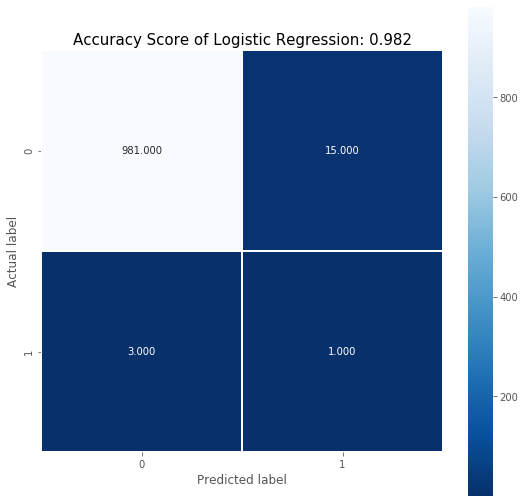

In [272]:
from sklearn import metrics

predictions_log_reg = log_reg.predict(fin_scaled_data_test)
cm_log_reg = metrics.confusion_matrix(final_real_labels['target'], predictions_log_reg)

plt.figure(figsize=(9,9))
sns.heatmap(cm_log_reg, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score of Logistic Regression: {0}'.format(log_reg.score(fin_scaled_data_test,final_real_labels['target']))
plt.title(all_sample_title, size = 15);
plt.show();

## Using logistic regression, I also predicted the probabilities based on my model

In [264]:
predictions_log_reg = log_reg.predict_proba(fin_scaled_data_test)

final_probs=pd.DataFrame(predictions_log_reg)
final_probs

intermediate_df_test=test_data.copy()
final_probs['image_name']=intermediate_df_test['image_name']

final_probs['prob_benign']=final_probs[0]
final_probs['prob_malignant']=final_probs[1]
final_probs = final_probs.drop(0, axis = 1)
final_probs = final_probs.drop(1, axis = 1)
final_probs

image_name  prob_benign  prob_malignant
0    ISIC_0052349     0.989521        0.010479
1    ISIC_0058510     0.987250        0.012750
2    ISIC_0073313     0.987690        0.012310
3    ISIC_0073502     0.993331        0.006669
4    ISIC_0074618     0.979554        0.020446
..            ...          ...             ...
995  ISIC_0997441     0.838933        0.161067
996  ISIC_0998106     0.803048        0.196952
997  ISIC_0998563     0.967368        0.032632
998  ISIC_0998993     0.960853        0.039147
999  ISIC_0999078     0.755657        0.244343

[1000 rows x 3 columns]

## Part 6D: SVM Classifier 
## Reference:
https://stackoverflow.com/questions/20113206/scikit-learn-svc-decision-function-and-predict

In [279]:
from sklearn.svm import SVC

svm_classifier = SVC(gamma=0.1, random_state = 0)
svm_classifier.fit(fin_scaled_data_train,train_label)


p = np.array(svm_classifier.decision_function(fin_scaled_data_test)) # decision is a voting function
prob = np.exp(p)/np.sum(np.exp(p),axis=0) # softmax after the voting
svm_predictions = svm_classifier.predict(fin_scaled_data_test)


In [281]:
_ = [print('Sample={}, Prediction={},\n Votes={} \nP={}, '.format(idx,c,v, s)) for idx, (v,s,c) in enumerate(zip(p,prob,svm_predictions))]

Sample=0, Prediction=0.0,
 Votes=-0.9197189395690286 
P=0.0010000000000000002, 
Sample=1, Prediction=0.0,
 Votes=-0.9197189395690286 
P=0.0010000000000000002, 
Sample=2, Prediction=0.0,
 Votes=-0.9197189395690286 
P=0.0010000000000000002, 
Sample=3, Prediction=0.0,
 Votes=-0.9197189395690286 
P=0.0010000000000000002, 
Sample=4, Prediction=0.0,
 Votes=-0.9197189395690286 
P=0.0010000000000000002, 
Sample=5, Prediction=0.0,
 Votes=-0.9197189395690286 
P=0.0010000000000000002, 
Sample=6, Prediction=0.0,
 Votes=-0.9197189395690286 
P=0.0010000000000000002, 
Sample=7, Prediction=0.0,
 Votes=-0.9197189395690286 
P=0.0010000000000000002, 
Sample=8, Prediction=0.0,
 Votes=-0.9197189395690286 
P=0.0010000000000000002, 
Sample=9, Prediction=0.0,
 Votes=-0.9197189395690286 
P=0.0010000000000000002, 
Sample=10, Prediction=0.0,
 Votes=-0.9197189395690286 
P=0.0010000000000000002, 
Sample=11, Prediction=0.0,
 Votes=-0.9197189395690286 
P=0.0010000000000000002, 
Sample=12, Prediction=0.0,
 Votes=-0.9

In [313]:
print('Training Score of SVM Classifier is :: {}\n'.format(svm_classifier.score(fin_scaled_data_train,train_label)))

Training Score of SVM Classifier is :: 1.0



In [314]:
svm_predictions = svm_classifier.predict(fin_scaled_data_test)

In [315]:
from sklearn.metrics import accuracy_score
print("Validation Accuracy of Polynomial SVM is: " + str(accuracy_score(final_real_labels['target'],svm_predictions)))

Validation Accuracy of Polynomial SVM is: 0.996


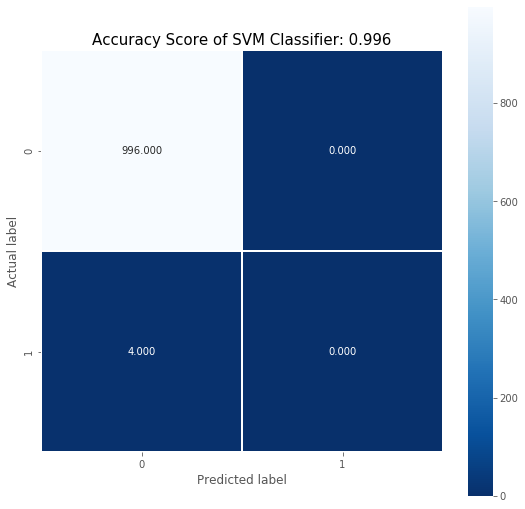

In [316]:
from sklearn import metrics

svm_predictions = svm_classifier.predict(fin_scaled_data_test)
cm_log_reg = metrics.confusion_matrix(final_real_labels['target'], svm_predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm_log_reg, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score of SVM Classifier: {0}'.format(svm_classifier.score(fin_scaled_data_test,final_real_labels['target']))
plt.title(all_sample_title, size = 15);
plt.show();

## By simply comparing the accuracy_scores and confusion matrices, we can observe that the accuracy of our model on the given testing dataset is very good. However, I am also suspecting that high value of accuracy is also somehow related to the imbalance in testing dataset itself. The benign cases dominate the testing dataset itself. 

## Finally, the goal of this project was to merge meta data and image data, apply the application of dimensionality reduction technique (PCA) and finally predict the accuracy of the model on the merged dataset. Conclusion can be made that the model we built works well despite all the information lost from image removal (imbalance) and PCA (pixel reduction)

## P.S. Another point to consider is the memory of the machine. I had problems associated with the memory use of kernel and had to manually adjust them from the default directory of system properties of Windows.